<a href="https://colab.research.google.com/github/ayushwattal/FishMarketAnalysis/blob/main/FishMarketAnalysis_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./Fish.csv") 

# Exploratory Data Analysis

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Renaming Column Names for better understanding
df.columns = ['species', 'weight','vertical_length','diagnol_length','cross_length','height','width']

In [5]:
df.head()

,species,weight,vertical_length,diagnol_length,cross_length,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df.describe()

,weight,vertical_length,diagnol_length,cross_length,height,width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Least-squares regression Line 

In [7]:
# Doing calculation to compute the least-square regression line

x = np.array(df['vertical_length'])
y = np.array(df['weight'])
n = len(x)
    
# Doing calculation to compute the least-square regression line

sum_x  = np.sum(x)
sum_y  = np.sum(y)
sum_xx = np.sum(x*x)
sum_xy = np.sum(x*y)
mean_x = np.mean(x)
mean_y = np.mean(y)
    
numerator   = sum_xy - ((sum_x*sum_y)/n)
denominator = sum_xx - ((sum_x*sum_x)/n)

# m and b are the slope and intercept calculated for given x and y values 

m = numerator/denominator
b = mean_y - m*mean_x

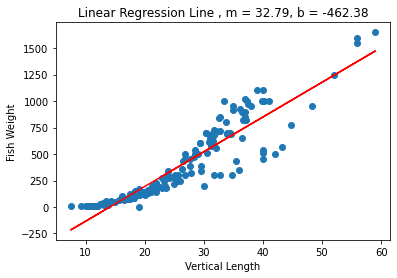

<Figure size 720x360 with 0 Axes>

In [8]:
# regression line plot

plt.scatter(x,y)
plt.plot(x, m*x+b, color='red')
plt.title(f'Linear Regression Line , m = {m:.2f}, b = {b:.2f}')
plt.ylabel("Fish Weight")
plt.xlabel("Vertical Length")
plt.figure(figsize=(10,5))
plt.show()

The Linear Regression Line is straight line with postive upward slope .

As value of x (vertical length) is increasing the value of y (weight) is also increasing gradually.

Thus, we can say that y is dependent on x value

# Correlation Coefficient


In [9]:
# The method calculates the correlation coefficient between all the numerical columns
corr = df.corr(method='pearson')
corr

,weight,vertical_length,diagnol_length,cross_length,height,width
weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
vertical_length,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
diagnol_length,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
cross_length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


From above correlation coefficient values we can see that Correlation between cross_length and weight is stronger as r value is 0.917462.

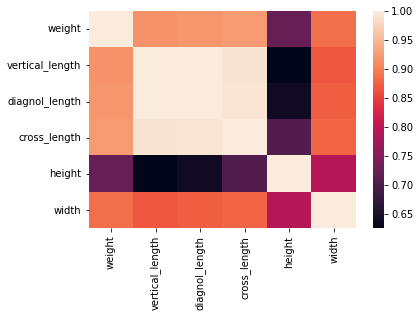

In [10]:
# Plotting the heat map for the correlation values

sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels=corr.columns.values)

# Split the data for training and testing

In [11]:
from sklearn.model_selection import train_test_split
x = df.drop(['weight','species'], axis=1).values
y = df['weight'].values

X_train, X_test, Y_train, Y_test =  train_test_split( x,y,test_size=0.3, random_state=10)


In [12]:
# Shapes of the training and testing data

print(f'Shape of training set for X = {X_train.shape}')
print(f'Shape of testing  set for X = {X_test.shape}')
print(f'Shape of training set for Y = {Y_train.shape}')
print(f'Shape of testing  set for Y = {Y_test.shape}')

Shape of training set for X = (111, 5)
Shape of testing  set for X = (48, 5)
Shape of training set for Y = (111,)
Shape of testing  set for Y = (48,)


In [13]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
Y_predict = linear_regression.predict(X_test)

# Coefficient of Determination

In [14]:
import math

from sklearn.metrics import r2_score
r2 = r2_score(Y_test ,Y_predict)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.3f}')
print(f'     correlation coefficient = {r:.3f}')

coefficient of determination = 0.809
     correlation coefficient = 0.899


In [15]:
from sklearn import metrics

# Using Predicted values
predicted = Y_predict
expected  = Y_test


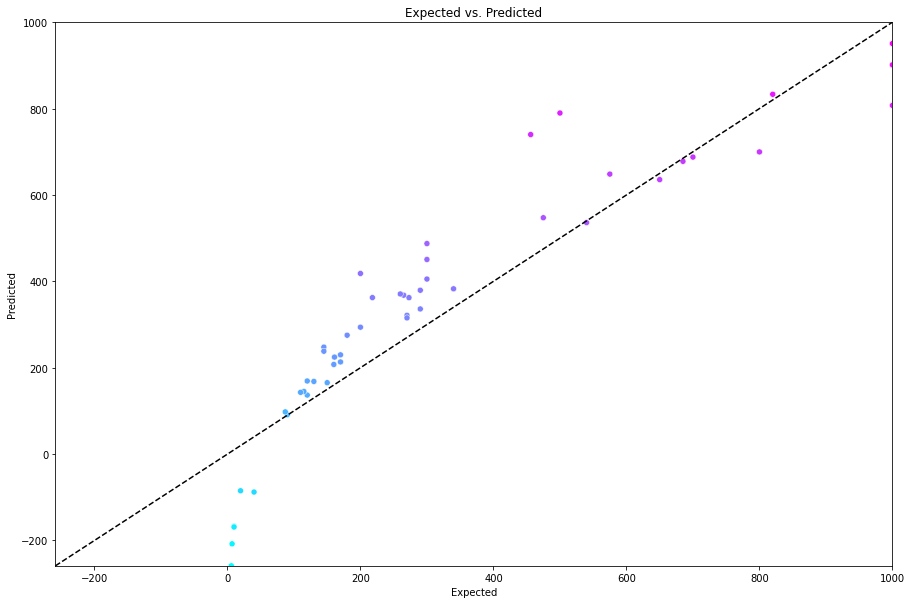

In [16]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

plt.title('Expected vs. Predicted')
line = plt.plot([start, end], [start, end], 'k--')